## GRUPO 2

In [1]:
#PCA
from sklearn.decomposition import PCA
# Tensorflow
import tensorflow as tf
from tensorflow import keras

#Genericas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from mlxtend.preprocessing import standardize
import math
import cv2

## Limpieza del dataset

Carga de dataset de imagenes y dataset de nombres

In [2]:
X = np.load('AUSTRAL_MCD_FACE_v2.npy')
y = np.load('AUSTRAL_MCD_FACE_TARGET_v2.npy')
print(X.shape)
print(y.shape)

(341, 150, 150)
(341,)


In [3]:
def data_augmentation(X, y):
    X_aug = []
    y_aug = []
    for i in range(len(X)):
        X_aug.append(X[i])
        X_aug.append(cv2.flip(X[i], 1))
        X_aug.append(cv2.flip(X[i], 0))
        X_aug.append(cv2.flip(X[i], -1))
        X_aug.append(cv2.rotate(X[i], cv2.ROTATE_90_CLOCKWISE))
        X_aug.append(cv2.rotate(X[i], cv2.ROTATE_90_COUNTERCLOCKWISE))
        X_aug.append(cv2.rotate(X[i], cv2.ROTATE_180))
        for j in range(7):
            y_aug.append(y[i])
    return np.array(X_aug), np.array(y_aug) 

X,y=data_augmentation(X, y)
print(X.shape)
print(y.shape)

(2387, 150, 150)
(2387,)


Persona|Aparece|Observaciones
--- | ---|---
Andres | 22 |---
Carla | 21 |Borrar
Claudia | 12 |---
Edu | 27 |---
Elemir | 12 |---
Fernanda | 20 |---
Geronimo | 11 |---
Hernan | 18 |---
Jiang | 19 |---
Joaquin | 10 |---
Josefina | 12 |---
Julieta | 12 |---
Lujan | 10 |---
Mai | 15 |---
Marcelo G | 10 |---
Marcelo T | 16 |---
Maribel | 10 |---
Marisa | 10 |---
Nestor | 10 |---
Oscar | 10 |---
Ramon | 10 |---
Rodrigo E | 9 |---
Rodrigo E.jpg | 1 |Borrar
Rodrigo G | 11 |Borrar
Sebastian | 14 |---
Silvia | 9 |La que menos aparece

Se eliminan alumnos que ya no cursan la maestria

In [4]:
X = np.delete(X, np.where(y == 'Rodrigo E.jpg'), 0)
y = np.delete(y, np.where(y == 'Rodrigo E.jpg'), 0)

X = np.delete(X, np.where(y == 'Rodrigo G'), 0)
y = np.delete(y, np.where(y == 'Rodrigo G'), 0)

X = np.delete(X, np.where(y == 'Carla'), 0)
y = np.delete(y, np.where(y == 'Carla'), 0)

nombres_y=y
nombres_y

array(['Marcelo T', 'Marcelo T', 'Marcelo T', ..., 'Marcelo T',
       'Marcelo T', 'Marcelo T'], dtype='<U13')

Obtener los nombres únicos en el arreglo y número de registros a recopilar por cada nombre


In [5]:
nombres_unicos = np.unique(y)  

registros_por_nombre = 100

resultados = []
resultados2 = []

for nombre in nombres_unicos:
    indices = np.where(y == nombre)[0][:registros_por_nombre]
    registros = y[indices]
    registros2 = X[indices]
    resultados.extend(registros)
    resultados2.extend(registros2)

resultados = np.array(resultados)
y = resultados
X = np.array(resultados2)

In [6]:
print(y.shape)
print(X.shape)

(1897,)
(1897, 150, 150)


In [7]:
# Lista de nombres
nombres = np.unique(y)

# Crear un diccionario para mapear cada nombre a un valor numérico
mapeo_nombres = {nombre: i for i, nombre in enumerate(np.unique(nombres))}

# Crear una matriz de valores numéricos codificados
nombres_codificados = np.array([mapeo_nombres[nombre] for nombre in nombres])

y = np.searchsorted(nombres, y)

In [8]:
# Lista de nombres
nombres = np.unique(y)
nombres

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22], dtype=int64)

In [9]:
# Crear un diccionario para mapear cada nombre a un valor numérico
mapeo_nombres = {nombre: i for i, nombre in enumerate(np.unique(nombres))}
mapeo_nombres

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22}

In [10]:
# Crear una matriz de valores numéricos codificados
nombres_codificados = np.array([mapeo_nombres[nombre] for nombre in nombres])
nombres_codificados

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [11]:
y = np.searchsorted(nombres, y)
y

array([ 0,  0,  0, ..., 22, 22, 22], dtype=int64)

Armamos set de entrenamiento y test

In [12]:
percentage = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=percentage, random_state=42)
targets = y.reshape(-1, 1)

In [13]:
X_train.shape, Y_train.shape

((1327, 150, 150), (1327,))

In [14]:
X_test.shape, Y_test.shape

((570, 150, 150), (570,))

Imprime los valores únicos y las cantidades de repeticiones del set de entrenamiento

In [15]:
unique, counts = np.unique(Y_train, return_counts=True)
print("Persona|Aparece|")
print("--- | ---|---") 
for i in range(len(unique)):
    print("{} | {} |---".format(unique[i], counts[i]))

Persona|Aparece|
--- | ---|---
0 | 70 |---
1 | 59 |---
2 | 70 |---
3 | 59 |---
4 | 70 |---
5 | 54 |---
6 | 70 |---
7 | 70 |---
8 | 49 |---
9 | 59 |---
10 | 58 |---
11 | 49 |---
12 | 70 |---
13 | 49 |---
14 | 70 |---
15 | 49 |---
16 | 49 |---
17 | 49 |---
18 | 49 |---
19 | 49 |---
20 | 44 |---
21 | 68 |---
22 | 44 |---


Imprime los valores únicos y las cantidades de repeticiones del set de test

In [16]:
unique, counts = np.unique(Y_test, return_counts=True)
print("Persona|Aparece|")
print("--- | ---|---") 
for i in range(len(unique)):
    print("{} | {} |---".format(unique[i], counts[i]))

Persona|Aparece|
--- | ---|---
0 | 30 |---
1 | 25 |---
2 | 30 |---
3 | 25 |---
4 | 30 |---
5 | 23 |---
6 | 30 |---
7 | 30 |---
8 | 21 |---
9 | 25 |---
10 | 26 |---
11 | 21 |---
12 | 30 |---
13 | 21 |---
14 | 30 |---
15 | 21 |---
16 | 21 |---
17 | 21 |---
18 | 21 |---
19 | 21 |---
20 | 19 |---
21 | 30 |---
22 | 19 |---


# 1.PCA

Vemos las componentes del conjunto en test y train.

In [17]:
print("X_train shape", X_train.shape)
print("Y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("Y_test shape", Y_test.shape)
print("Numero de target", len(np.unique(y)))

print("\nEtiquetas distintas en cada target")
print("Y_train shape", len(np.unique(Y_train)))
print("Y_test shape", len(np.unique(Y_test)))


X_train shape (1327, 150, 150)
Y_train shape (1327,)
X_test shape (570, 150, 150)
Y_test shape (570,)
Numero de target 23

Etiquetas distintas en cada target
Y_train shape 23
Y_test shape 23


Graficamos algunos ejemplos del conjunto dado del set de entrenamiento

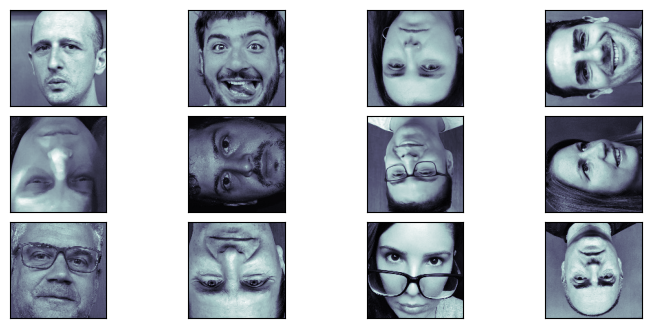

In [18]:
# show dataset.
fig, axes = plt.subplots(3, 4, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='bone')

Hago un reshaping para poder hacer el PCA

In [19]:
# Reshaping the dataset
X_train = X_train.reshape(X_train.shape[0], 22500) 
X_test = X_test.reshape(X_test.shape[0], 22500)  

# Change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (1327, 22500)
Testing matrix shape (570, 22500)


Estandarizamos para aplicar escala de grises

In [20]:
print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

X_train = X_train/255.0
X_test = X_test/255.0

print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

0.0 255.0
0.0 255.0
0.0 1.0
0.0 1.0


Aplicamos PCA para 90% de la variabilidad de los datos

In [21]:
pca = PCA(n_components=.90, svd_solver = 'full')
pca.fit(X_train)

PCA(n_components=0.9, svd_solver='full')

Cantidad de componentes principales que explican una variabilidad del 90 %

In [22]:
pca.n_components_

183

In [23]:
# Calcula la variancia acumulada
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>90)
print("Componentes variancia 90%: "+ str(k+1))

Componentes variancia 90%: 183


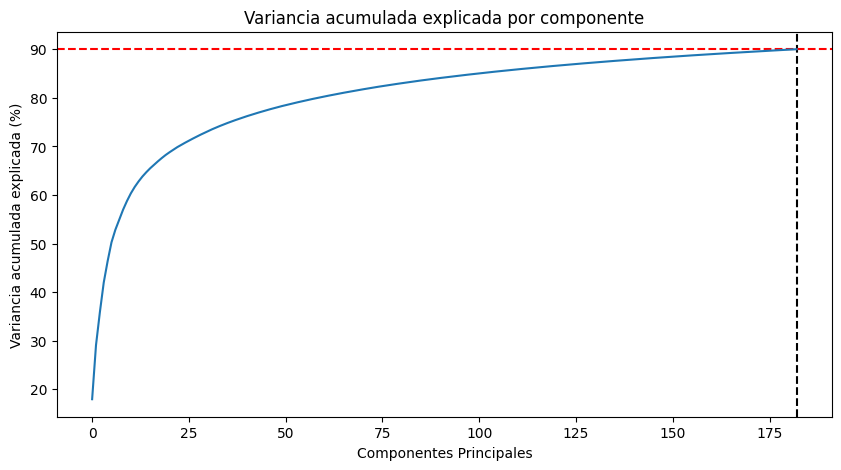

In [24]:
# Grafica Variancia Acumulada
plt.figure(figsize=[10,5])
plt.title('Variancia acumulada explicada por componente')
plt.ylabel('Variancia acumulada explicada (%)')
plt.xlabel('Componentes Principales')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

Aplicamos PCA para ambos sets (entrenamiento y test)

In [25]:
train_img = pca.transform(X_train)
test_img = pca.transform(X_test)

print(f'train_img shape : {train_img.shape}')
print(f'test_img shape : {test_img.shape}')

train_img shape : (1327, 183)
test_img shape : (570, 183)


Las etiquetas de `Y_train` y `Y_test` son números entre 0 y 24.

Convertimos las etiquetas de clase a la codificación 1-de-K. Para ello utilizamos la función `keras.utils.to_categorical` (similar al  `OneHotEncoder` de `sklearn`).


In [26]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
Y_train_ohe = encoder.fit_transform(Y_train.reshape(-1, 1)).toarray()
Y_test_ohe = encoder.fit_transform(Y_test.reshape(-1, 1)).toarray()

print(Y_train_ohe[:3], Y_train[:3])
print(Y_test_ohe[:3], Y_test[:3])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [5 8 9]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [7 7 0]


# Aplicacion de Tensorflow

In [44]:
# Creación de la red
model = keras.models.Sequential()

# Input layer
model.add(keras.layers.InputLayer(input_shape=(pca.n_components_,)))
model.add(keras.layers.Dropout(0.25))

# Dos capas ocultas 
model.add(keras.layers.Dense(60, activation='sigmoid'))
model.add(keras.layers.Dropout(0.45))

# Capa de salida. .
model.add(keras.layers.Dense(23, activation='sigmoid'))
model.add(keras.layers.Dropout(0.15))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 183)               0         
                                                                 
 dense (Dense)               (None, 60)                11040     
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense_1 (Dense)             (None, 23)                1403      
                                                                 
 dropout_2 (Dropout)         (None, 23)                0         
                                                                 
Total params: 12,443
Trainable params: 12,443
Non-trainable params: 0
_________________________________________________________________


In [46]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [47]:
#learning_rate_tf = 0.20 
#optimizer = keras.optimizers.Adam(learning_rate=learning_rate_tf)
#model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.Recall(class_id=5)])
model.compile(loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.Recall(class_id=5)])

In [48]:
early = keras.callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                      restore_best_weights=True)
ajuste = model.fit(epochs=500, x=train_img, y=Y_train_ohe, validation_data=(test_img, Y_test_ohe), callbacks=[early,])

Epoch 1/500
42/42 [==============================] - 4s 36ms/step - loss: 5.0637 - accuracy: 0.0610 - recall: 0.7778 - val_loss: 3.0746 - val_accuracy: 0.0825 - val_recall: 0.9130
Epoch 2/500
42/42 [==============================] - 0s 9ms/step - loss: 4.8740 - accuracy: 0.0776 - recall: 0.7037 - val_loss: 3.0126 - val_accuracy: 0.1088 - val_recall: 0.6957
Epoch 3/500
42/42 [==============================] - 0s 8ms/step - loss: 5.0835 - accuracy: 0.0769 - recall: 0.5185 - val_loss: 2.9617 - val_accuracy: 0.1351 - val_recall: 0.6522
Epoch 4/500
42/42 [==============================] - 0s 8ms/step - loss: 4.7081 - accuracy: 0.1025 - recall: 0.4444 - val_loss: 2.9139 - val_accuracy: 0.1614 - val_recall: 0.6522
Epoch 5/500
42/42 [==============================] - 0s 11ms/step - loss: 4.7957 - accuracy: 0.1145 - recall: 0.5741 - val_loss: 2.8640 - val_accuracy: 0.1965 - val_recall: 0.5217
Epoch 6/500
42/42 [==============================] - 0s 7ms/step - loss: 4.6348 - accuracy: 0.1213 - re

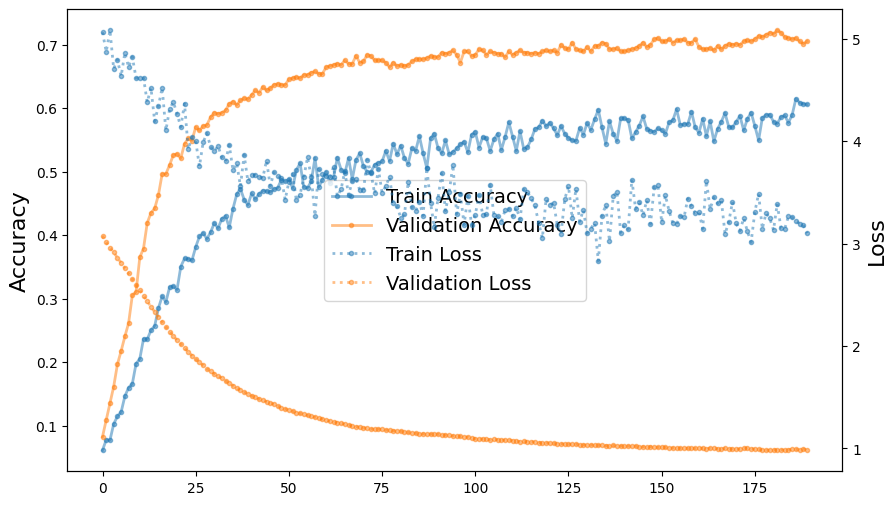

In [49]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

kw = {'marker': '.', 'lw': 2, 'alpha': 0.5}
l0, = ax.plot(ajuste.history['accuracy'], label='Train Accuracy', **kw)
l1, = ax.plot(ajuste.history['val_accuracy'], label='Validation Accuracy', **kw)

ax2 = ax.twinx()
ll0, = ax2.plot(ajuste.history['loss'], ls=':', color='C0', label='Train Loss', **kw)
ll1, = ax2.plot(ajuste.history['val_loss'], ls=':', color='C1', label='Validation Loss', **kw)

ax.set_ylabel('Accuracy', fontsize=16)
ax2.set_ylabel('Loss', fontsize=16)

ax.legend(handles=[l0, l1, ll0, ll1], loc='center', fontsize=14)
# plt.legend(loc=0)

In [50]:
#Prediccion
model.evaluate(test_img, Y_test_ohe)

18/18 [==============================] - 0s 3ms/step - loss: 0.9826 - accuracy: 0.7193 - recall: 0.0000e+00


[0.9825870990753174, 0.719298243522644, 0.0]

In [51]:
# Calcular las predicciones y buscamos los casos con error
y_predict = np.argmax(model.predict(test_img), axis=1)

ierror = (y_predict - Y_test != 0)

# Cuántos hay
print('Hay {} errores en el conjunto de validación sobre un total de {} imagenes'.format(np.sum(ierror), len(test_img)))

18/18 [==============================] - 0s 3ms/step
Hay 160 errores en el conjunto de validación sobre un total de 570 imagenes


In [55]:
# Iterar sobre los datos de entrada y hacer predicciones
filas_qty = len(test_img)
resultados = []
for fila in range(filas_qty):
    # Verificar si la predicción es correcta
    prediccion_correcta = nombres_unicos[Y_test[fila]] == nombres_unicos[y_predict[fila]]
    
    # Agregar el resultado a la lista
    resultados.append({'Foto': fila+1,
                       'Clase Real': nombres_unicos[Y_test[fila]],
                       'Clase Predicha': nombres_unicos[y_predict[fila]],
                       'Predicción Correcta': prediccion_correcta})

# Crear la tabla con los resultados
tabla_resultados = pd.DataFrame(resultados)
pd.set_option('display.max_rows', None)
              
# Mostrar la tabla
print(tabla_resultados)

print("Cantidad de aciertos: ", filas_qty-sum(ierror), "sobre un total de ",filas_qty, "fotos")
print("Accuracy: ", ((filas_qty-sum(ierror))/filas_qty)*100)

     Foto Clase Real Clase Predicha  Predicción Correcta
0       1      Jiang          Jiang                 True
1       2      Jiang          Jiang                 True
2       3     Andres         Andres                 True
3       4   Geronimo         Nestor                False
4       5  Sebastian      Sebastian                 True
5       6      Jiang          Jiang                 True
6       7   Josefina       Josefina                 True
7       8      Jiang          Jiang                 True
8       9      Lujan          Lujan                 True
9      10  Sebastian      Sebastian                 True
10     11  Sebastian      Sebastian                 True
11     12     Silvia         Silvia                 True
12     13     Elemir         Elemir                 True
13     14     Nestor         Nestor                 True
14     15    Joaquin        Joaquin                 True
15     16   Fernanda         Andres                False
16     17        Mai           